In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

%load_ext lab_black

# 9. Weibull Lifetimes*

Adapted from [Unit 5: metro2.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit5/metro2.m).

  0%|          | 0/1000000 [00:00<?, ?it/s]

np.mean(alphas)=0.8946068730747929
np.var(alphas)=0.1362387303239647
np.mean(etas)=1.8368073523412645
np.var(etas)=0.7482303084883631


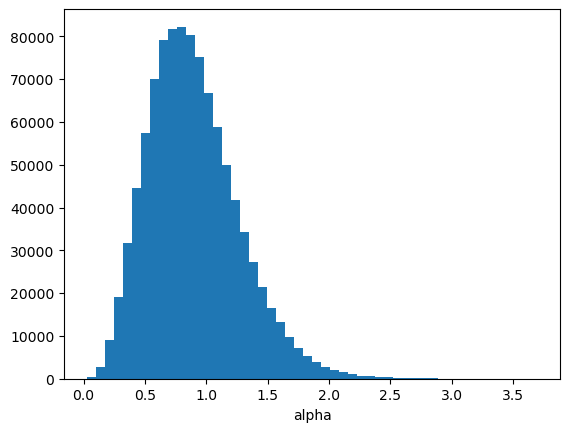

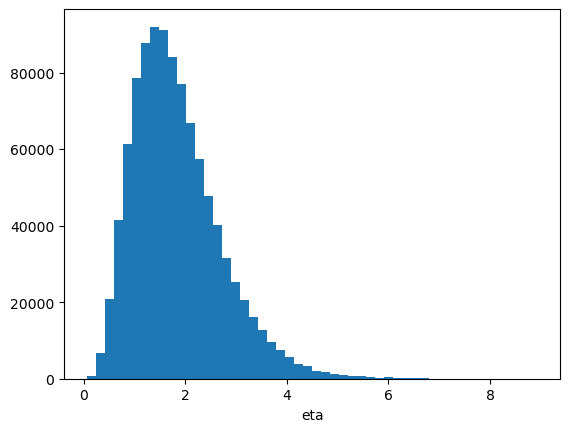

In [2]:
rng = np.random.default_rng(1)

obs = 1000000
burn = 500
data = np.array([0.2, 0.1, 0.25])  # observed
data_prod = np.prod(data)  # prod1 in MATLAB code
n = len(data)

# inits
alpha = 2
eta = 2
alphas = np.zeros(obs)
etas = np.zeros(obs)

beta = 2
xi = 2

# pre-generate 3 sets of uniform randoms
unif = rng.uniform(size=obs)
log_unif_alpha = np.log(rng.uniform(size=obs))
log_unif_eta = np.log(rng.uniform(size=obs))

for i in tqdm(range(obs)):
    # proposals
    alpha_prop = -alpha * log_unif_alpha[i]
    eta_prop = -eta * log_unif_eta[i]

    # prod2 in MATLAB code
    prop_prod = np.prod(np.exp(eta * data**alpha - eta_prop * data**alpha_prop))

    # acceptance ratio
    rr = (
        (eta_prop / eta) ** (beta - 1)
        * np.exp(alpha - alpha_prop - xi * (eta_prop - eta))
        * np.exp(
            -alpha / alpha_prop - eta / eta_prop + alpha_prop / alpha + eta_prop / eta
        )
        * data_prod ** (alpha_prop - alpha)
        * prop_prod
        * ((alpha_prop * eta_prop) / (alpha * eta)) ** (n - 1)
    )

    rho = min(rr, 1)
    if unif[i] < rho:
        alpha = alpha_prop
        eta = eta_prop

    alphas[i] = alpha
    etas[i] = eta

alphas = alphas[burn:]
etas = etas[burn:]

print(f"{np.mean(alphas)=}")
print(f"{np.var(alphas)=}")
print(f"{np.mean(etas)=}")
print(f"{np.var(etas)=}")

plt.hist(alphas, 50)
plt.xlabel("alpha")
plt.show()

plt.hist(etas, 50)
plt.xlabel("eta")
plt.show()

In [3]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

matplotlib: 3.6.3
numpy     : 1.24.2

